**Objective:**
The objective of this project is to perform sentiment analysis on coronavirus-related textual data using a Multinomial Naive Bayes (NB) classifier. The aim is to gain insights into public sentiment towards the COVID-19 pandemic across different topics, time periods, and geographical regions.

**Methodology:**
1. **Data Collection:** Textual data related to COVID-19 is collected from various sources such as social media platforms (Twitter, Facebook), news articles, blogs, and public forums.
  
2. **Data Preprocessing:** The collected data undergoes preprocessing steps including text cleaning, tokenization, stop-word removal, and stemming or lemmatization to prepare it for analysis.
  
3. **Feature Extraction:** Text data is transformed into numerical feature vectors using techniques like TF-IDF (Term Frequency-Inverse Document Frequency), which represents the importance of words in the documents.
  
4. **Model Training:** A Multinomial Naive Bayes (NB) classifier is trained on the preprocessed and transformed data. Multinomial NB is a probabilistic classifier based on Bayes' theorem and is particularly suitable for text classification tasks.
  
5. **Model Evaluation:** The performance of the trained Multinomial NB model is evaluated using metrics such as accuracy, precision, recall, and F1-score. Cross-validation techniques may also be employed to ensure the robustness of the model.
  
6. **Sentiment Analysis:** The trained model is applied to new textual data to predict the sentiment expressed in the text. Sentiment labels such as positive, negative, or neutral are assigned to each text document based on the model's predictions.
  
7. **Visualization and Interpretation:** The results of the sentiment analysis are visualized using charts, graphs, and word clouds to provide insights into the prevailing sentiment towards COVID-19. Analysis may include trends over time, sentiment distribution across different topics or regions, and comparison between various data sources.


In [1]:
pip install category_encoders 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import nltk
nltk.download('stopwords')
  
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sobitha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading data

In [3]:
df_train = pd.read_csv("D:\downloads\Corona_NLP_train.csv",encoding = "ISO-8859-1")
df_test = pd.read_csv("D:\downloads\Corona_NLP_test.csv")

In [4]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
df_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


Analysing Data

In [6]:
df_train["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [8]:
corpus = []
stemmer = PorterStemmer() 
for i in range(len(df_train)):
    review = re.sub('[^a-zA-Z]'," ",df_train["OriginalTweet"][i])
    review = review.lower()
    review = review.split()
    review = [stemmer.stem(word) for word in review if word.lower() not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [9]:
corpus[1:10]

['advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med order',
 'coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak http co binca vp p',
 'food stock one empti pleas panic enough food everyon take need stay calm stay safe covid franc covid covid coronaviru confin confinementot confinementgener http co zrlg z j',
 'readi go supermarket covid outbreak paranoid food stock litterali empti coronaviru seriou thing pleas panic caus shortag coronavirusfr restezchezv stayathom confin http co usmualq n',
 'news region first confirm covid case came sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper good tim dodson report http co cfxch lu',
 'cashier groceri store share insight covid prove credibl comment civic class know talk http co iefdnehgdo',
 'supermarket today buy toilet paper rebel toiletpaper

In [10]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(corpus).toarray()

In [11]:
def ordinal_encoding(df,col,mapping):
    ordinal_encoder = ce.OrdinalEncoder(cols = [col],return_df = True,mapping = [{'col':col,'mapping':mapping}])
    df_final = ordinal_encoder.fit_transform(df)
    return df_final

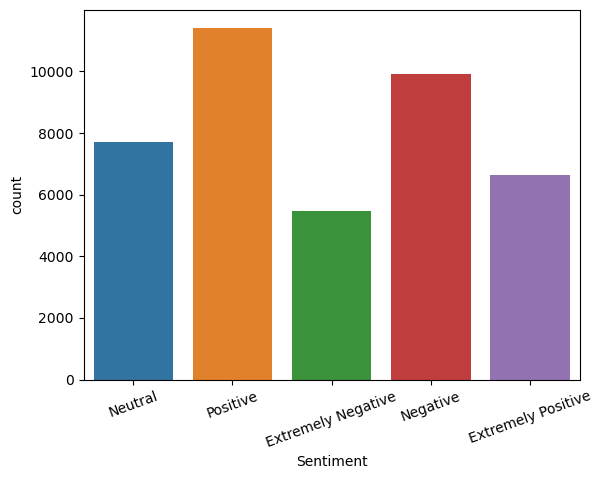

In [12]:
plot = sns.countplot(x='Sentiment', data=df_train).set_xticklabels(labels=['Neutral', 'Positive', 'Extremely Negative', 'Negative','Extremely Positive'],rotation=20)


In [13]:
dict = {'Neutral':3, 'Positive':2, 'Extremely Negative':5, 'Negative':4,
       'Extremely Positive':1}

In [14]:
df_train_final = ordinal_encoding(df_train,"Sentiment",dict)

In [15]:
def minimize_categories(val):
    if val == 1 or val == 2:
        return 1
    elif val == 3:
        return 2
    elif val == 4 or val == 5:
        return 3

In [16]:
df_train_final["Sentiment"] = df_train_final["Sentiment"].apply(minimize_categories)

<Axes: xlabel='Sentiment', ylabel='count'>

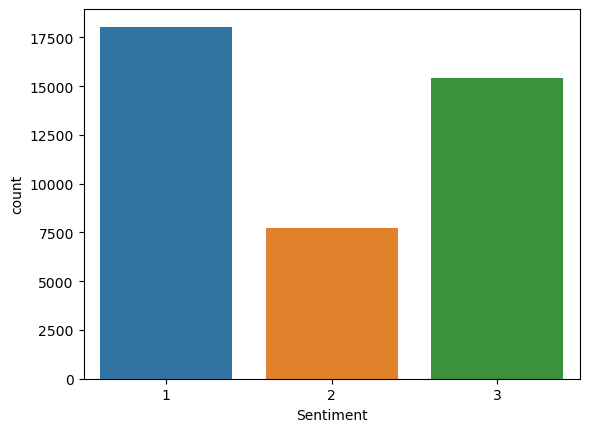

In [17]:
sns.countplot(x='Sentiment', data=df_train_final)

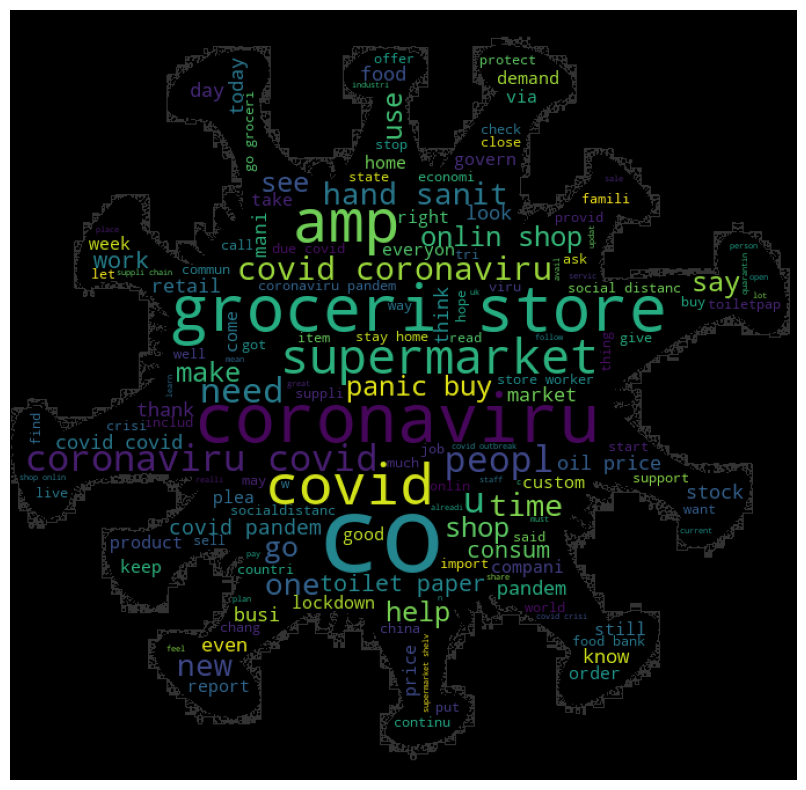

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
import requests
import io
response = requests.get("https://res.cloudinary.com/maxie/image/upload/v1617197755/TEMP/covid_ywd7ph.jpg")
image_bytes = io.BytesIO(response. content)
dataset = " ".join(corpus)
def create_word_cloud(string):

    maskArray = npy.array(Image.open(image_bytes))
    cloud = WordCloud(background_color = "black", max_words = 150, mask = maskArray, stopwords = set(STOPWORDS),contour_width=1, contour_color='#333')
    cloud.generate(string)
#     cloud.to_file("wordCloud.png")
    return cloud
dataset = dataset.lower()
wordcloud=create_word_cloud(dataset)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

In [19]:
Y = df_train_final["Sentiment"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state= 0,stratify =Y)

Training models

In [20]:
multinb = MultinomialNB()
multinb.fit(X_train,Y_train)

MultinomialNB()

In [21]:
Y_pred_multinb = multinb.predict(X_test)

In [22]:
log = LogisticRegression()
log.fit(X_train,Y_train)
Y_pred_log = log.predict(X_test)

D:\Users\sobitha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation

In [23]:
accuracy_score(Y_pred_multinb,Y_test)

0.6638726919339164

In [28]:
print(classification_report(Y_pred_multinb,Y_test))

              precision    recall  f1-score   support

           1       0.84      0.64      0.72      4760
           2       0.18      0.70      0.28       394
           3       0.70      0.70      0.70      3078

    accuracy                           0.66      8232
   macro avg       0.57      0.68      0.57      8232
weighted avg       0.76      0.66      0.69      8232



In [29]:
# predict(text)
text = "T 3590 -I have tested CoviD positive ..  shifted to Hospital  .. hospital informing  authorities .. family and staff undergone tests , results awaited ..All that have been in close proximity to me in the last 10 days are requested to please get themselves tested !"


In [30]:
def preprocess_text(text):
    corpus = []
    stemmer = PorterStemmer()
    review = re.sub('[^a-zA-Z]'," ",text)
    review = review.lower()
    review = review.split()
    review = [stemmer.stem(word) for word in review if word.lower() not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    return corpus

In [31]:
corpus = preprocess_text(text)
X = tfidf.transform(corpus).toarray()
prediction = log.predict(X)[0]
if prediction == 1:
    print("Your Tweet is Negative")
elif prediction == 2:
    print("Your Tweet is Neutral")
elif prediction == 3:
    print("your Tweet is Positive")

Your Tweet is Negative


In [32]:
pickle.dump(log,open("model_tweet.pkl","wb"))
pickle.dump(tfidf,open("tfidf_tweet.pkl","wb"))